In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import hdf5plugin
import h5py
import sys

#src_path  = 'src/'
sys.path.insert(0, 'src/')
from masking_tools import * 


### open hdf5 file 

read 2D data

In [2]:
file_path = '../data/lda_dp52/lda_dp52_00028_data_000001.h5'
h5file = h5py.File(file_path, 'r')

In [3]:
data = h5file['entry/data/data/']

In [4]:
i_frame = 950
dat = data[i_frame]

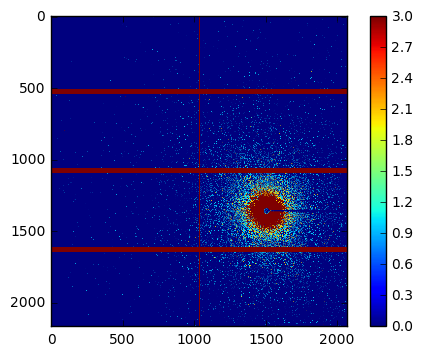

In [5]:
plt.imshow(dat,vmax=3)
plt.colorbar()
plt.show()

### make mask

borders mask

In [6]:
mask = np.array(dat)
thr  =  1e4
mask[mask<thr] = 1
mask[mask>thr] = 0
plt_data = np.log10(dat*mask+1)

circular mask

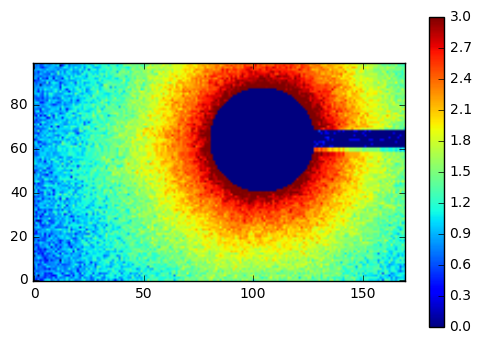

In [7]:
center = [1364,1504]
cmask = circular_mask(nx=dat.shape[0],ny=dat.shape[1],center_x=center[0],center_y=center[1],radius=24)
plt_data2 = cmask*plt_data
plt.imshow(plt_data2[1300:1400,1400:-500],vmax=3,origin='lower')
#plt.axhline(y=1365)
#plt.axvline(x=1500)
plt.colorbar()
plt.show()

beam blocker : masked 0.21 percent


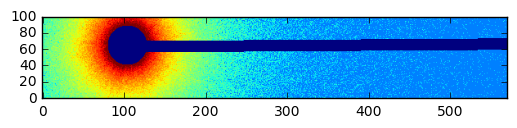

In [26]:
bmask = beam_blocker_mask(nx=dat.shape[0],ny=dat.shape[1],center_x=center[0],center_y=center[1],radius=24,thickness=14,offset=-5)
mask *=bmask 
plt_data2 = bmask*(plt_data+1)
plt.imshow(plt_data2[1300:1400,1400:-100],vmax=4,vmin=0.,origin='lower')
plt.show()

In [9]:
sum_data = np.sum(data,axis=0)

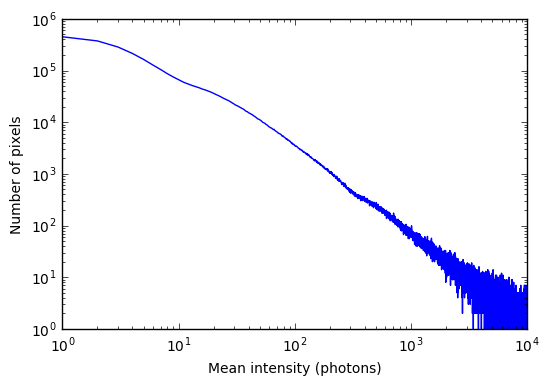

In [24]:
bi,bf,db = -1,1e4,1
hy,hx = np.histogram(sum_data,bins = np.arange(bi,bf,db)) 
plt.plot(hx[:-1],hy,'-',label='raw',color='blue')
plt.yscale('log',nonposy='clip')
plt.xscale('log',nonposy='clip')
plt.xlabel('Mean intensity (photons)')
plt.ylabel('Number of pixels')
plt.show()

In [29]:
np.save('masks/eiger_mask',mask)